## Laboratorio 6: Image edge detection using derivative operators

- Elaborado por: Oscar Omar Martínez Lujano 
- Matrícula: 352228  
- Carrera: ITR  
- Fecha: 2019-03-12  


### Introduction
There are many ways to perform edge detection. However, the most may be grouped into two categories, gradient and Laplacian. The gradient method detects the edges by looking for the maximum and minimum in the first derivative of the image. The Laplacian method searches for zerocrossings in the second derivative of the image to find edges. This first figure shows the edges of an image detected using the gradient method (Roberts, Prewitt, Sobel) and the Laplacian method (Marrs-Hildreth).

Edge detection includes a variety of mathematical methods that aim at identifying points in a digital image at which the image brightness changes sharply or, more formally, has discontinuities. The points at which image brightness changes sharply are typically organized into a set of curved line segments termed edges. The same problem of finding discontinuities in one-dimensional signals is known as step detection and the problem of finding signal discontinuities over time is known as change detection. Edge detection is a fundamental tool in image processing, machine vision and computer vision, particularly in the areas of feature detection and feature extraction.

The purpose of detecting sharp changes in image brightness is to capture important events and changes in properties of the world. It can be shown that under rather general assumptions for an image formation model, discontinuities in image brightness are likely to correspond to:

    - discontinuities in depth,
    - discontinuities in surface orientation,
    - changes in material properties and
    - variations in scene illumination.

In the ideal case, the result of applying an edge detector to an image may lead to a set of connected curves that indicate the boundaries of objects, the boundaries of surface markings as well as curves that correspond to discontinuities in surface orientation. Thus, applying an edge detection algorithm to an image may significantly reduce the amount of data to be processed and may therefore filter out information that may be regarded as less relevant, while preserving the important structural properties of an image. If the edge detection step is successful, the subsequent task of interpreting the information contents in the original image may therefore be substantially simplified. However, it is not always possible to obtain such ideal edges from real life images of moderate complexity. 


### Objectives


In this lab, you will learn about image edge detection. Edge detection is an important aspect in computer vision as it allows you to describe an object by one of its feature, which is its shape. Figure 1 (source) shows a road scenario where some of the main actors are pedestrians, cyclists, cars, trucks, traffic lights, pedestrian lights, trees, etc. Below that figure there are four particular images that show the edges of portions of the main image. Can you identify to what objects in the colour image those edge images correspond?. Because edges seem to be important when identifying or classifying objects, edge detection will be the core of this lab.

### Requerimientos del Laboratorio

EL software, hardware y herramientas de programación requeridas en este lab son:
  
    - Raspberry Pi with WiFi connection capabilities
    - Jupyter Notebook
    - Python >= 3.5.2
    - OpenCV 3.2
    - Git
    - GitHub account
    - Markdown editor (recommended: ReText 5.3.1)


### Procedimiento

The origin of edges in an image may comes from different factors, among them are:

    - surface normal discontinuity
    - depth discontinuity
    - surface colour discontinuity
    - illumination discontinuity

Figure 2 (source) illustrates each of these factors. However, how can we determine whether or not a particular pixel is part of a edge?. It seems that edges are steep cliffs or steep changes occurring somewhere in the image function f(x,y). For the greyscale image shown on the left in Figure 3, if we extracted its edges, they would look like those shown on the centre image. As can be seen from the right image, edges certainly represent steep changes in pixel value intensities. In this 3D representation, the x and y axes represent the width and height of the greyscale image; whereas the z axis represent the intensity value of each pixel.

<img src="Figs/botella.png" width="800" alt="Combined Image" />

<img src="Figs/figuras.png" width="800" alt="Combined Image" />


In order to detect edges in images, we then need to look for strong changes within an image region neighborhood. As we will later describe, the neighborhood size and the approach to detect strong changes in that neighborhood are two important aspect to consider when detecting edges.

From our calculus class, we can recall that the derivative of a function f(x) determines the direction in which that function changes more rapidly. Hence, we can use derivatives to detect edges. For the left subfigure shown in Figure 4 (source: S. Lazebnik), if we extract a scanline at a particular row, as that depicted in red, and plot that data, we would obtain the profile shown in the centre subfigure. If we then apply the derivative to that profile, we would obtain the first derivative, this is shown in the right subfigure. It seems then that the edges of the left subfigure correspond to the extrema of the first derivative, being the maximum negative and positive slopes the ones instantiating the left and right edges. Therefore, finding edges in an image will have to do with finding peak values in the derivative of a function. The way to find these peaks in the derivate of a function relates to applying a differential operator to that function.

<img src="Figs/onda.png" width="800" alt="Combined Image" />

#### The Gradient

Differential operators are used to return the derivatives of an image f(x,y) along both the x and y axes, partial-derivative-of-f-wrt-x, partial-derivative-of-f-wrt-y, respectively. One of the main advantages of using differential operators is that they can be modelled as kernels or masks so that we can apply convolution or correlation to find the image gradient function of f(x,y), denoted by gradiente-of-f-symbol, which is a two-dimensional column vector as follows:

<img src="Figs/primerform.gif" width="400" alt="Combined Image" />

This vector has the importance geometrical property that it points in the direction of the greatest rate of change of f at location (x,y). The gradient magnitude and gradient direction are given by:

<img src="Figs/SegundaForm.gif" width="200" alt="Combined Image" />

<img src="Figs/TercerForm.gif" width="150" alt="Combined Image" />

OpenCV has the method cv2.filter2D() that convolves an image with a kernel differential operator. Amongst the most well known differential operators are:

- Sobel Operator
- Prewitt Operator
- Roberts Operator
- Scharr Operator

In this section, we will focus on the Sobel operator, however, instead of using the cv2.filter2D() method, we will make use of the cv2.Sobel() function.

### a. Libraries

The following libraries are used in the code of this lab.

- ```cv2```: Implementa una gran variedad de algorítmos de procesamiento de imágenes y visión computacional.
- ```numpy:``` Crea y manipula listas, análisis numérico, etc.
- `matplotlib.pyplot:` Produce publicaciones con figuras de calidad en una variedad de formatos de copia impresa y entornos interactivos en todas las plataformas.

In [2]:
# importa librerías estandar
import numpy as numpy
import cv2
import matplotlib.pyplot as plt

### b. Sobel Operator

The code below illustrates how we can detect edges using the Sobel operator. This will serve as the basis for you to implement the Prewitt and Roberts using the cv2.filter2D() method. If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

- `cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])`
    - Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
    - src – input image.
    - ddepth –output image depth; the following combinations of src.depth() and ddepth are supported:
            src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
            src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
            src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
            src.depth() = CV_64F, ddepth = -1/CV_64F
            when ddepth=-1, the destination image will have the same depth as the source; in the case of 8-bit input images it will result in truncated derivatives.
    - xorder – order of the derivative x.
    - yorder – order of the derivative y.
    - ksize – size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
    - scale – optional scale factor for the computed derivative values; by default, no scaling is applied (see getDerivKernels() for details).
    - delta – optional delta value that is added to the results prior to storing them in dst.
    - borderType – pixel extrapolation method (see borderInterpolate for details).
    - **returns** – output image of the same size and the same number of channels as src .
    
    
- `numpy.absolute(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])`
    - Calculate the absolute value element-wise.
    - x:array_like - Input array.
    - out : ndarray, None, or tuple of ndarray and None, optional
        A location into which the result is stored. If provided, it must have a shape that the inputs broadcast to. If not provided or None, a freshly-allocated array is returned. A tuple (possible only as a keyword argument) must have length equal to the number of outputs.
    - where : array_like, optional
        Values of True indicate to calculate the ufunc at that position, values of False indicate to leave the value in the output alone.
    - **returns** - absolute : ndarray
        An ndarray containing the absolute value of each element in x. For complex input, a + ib, the absolute value is \sqrt{ a^2 + b^2 }. This is a scalar if x is a scalar.
        
- `np.uint8`
    - Unsigned integer (0 o 255)
    
    
- `numpy.zeros_like(a, dtype=None, order='K', subok=True)`
    - Return an array of zeros with the same shape and type as a given array.
    - a:array_like - The shape and data-type of a define these same attributes of the returned array.
    - dtype:data-type (optional) - Overrides the data type of the result. 
    - order:{‘C’, ‘F’, ‘A’, or ‘K’} (optional) - Overrides the memory layout of the result. ‘C’ means C-order, ‘F’ means F-order, ‘A’ means ‘F’ if a is Fortran contiguous, ‘C’ otherwise. ‘K’ means match the layout of a as closely as possible.
    - subok:bool (optional) - If True, then the newly created array will use the sub-class type of ‘a’, otherwise it will be a base-class array. Defaults to True.
    - **returns** - ndarray - array of zero with the same shame and type as a.
    
- `matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)`
- `matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)[source]`
    - Get or set the current tick locations and labels of the x-axis.
    - ticks:array_like - a list of positions at which ticks should be placed. You can pass an empty list to disable xticks.
    - labels:array_like (optional) - a list of explicit labels to place at the given locs.
    - **returns**: locs - an array of label locations
    - **returns**: labels - a list of text objects


Información obtenida de:
- https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=sobel#cv2.Sobel
- https://www.numpy.org/devdocs/user/basics.types.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

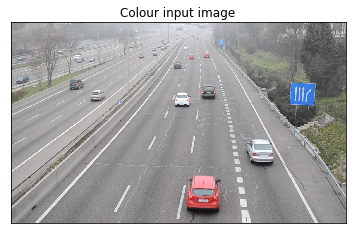

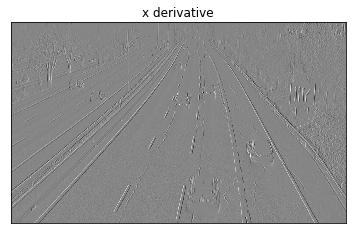

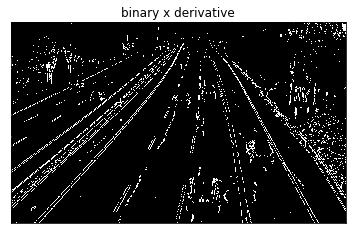

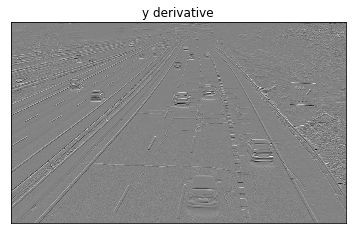

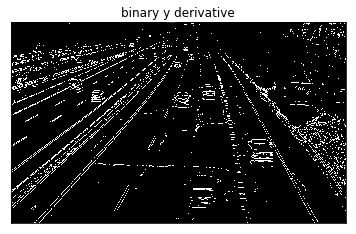

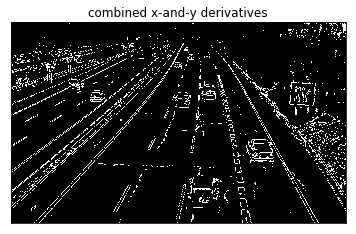

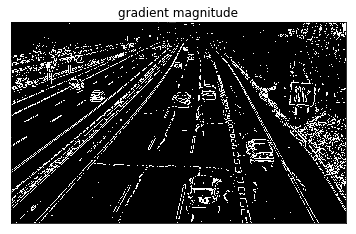

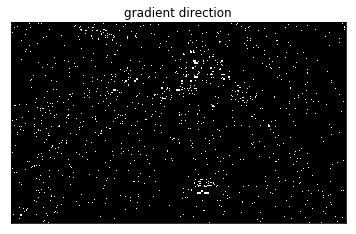

In [3]:
"""
	image_edge_detection_using_operators.py

	author: andres.hernandezg@udem.edu
	universidad de monterrey
"""

# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2


# compute Sobel gradient
def compute_absolute_sobel_gradient(img, ax='x', ksize=3, threshold=(40,140)):

	# 1) check whether img is a colour or greyscale image
	if len(img.shape)>2:

		# convert from colour to greyscale image
		grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

	else:
		# if greyscale grey=img
		grey = img

	# 2) take the derivate in 'ax' axis
	if ax.lower()=='x':

		# apply the Sobel operator along the x axis
		sobel_derivative = cv2.Sobel(grey, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=ksize, scale=1)

	if ax.lower()=='y':

		# apply the Sobel operator along the y axis
		sobel_derivative = cv2.Sobel(grey, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=ksize, scale=1)

	# 3) take the absolute value of the derivative
	sobel_absolute = np.absolute(sobel_derivative)

	# 4) scale to 8-bit (0-255), then convert to type = np.uint8
	sobel_scaled = np.uint8(255 * sobel_absolute / np.max(sobel_absolute))

	# 5) create a mask of 1's where threshold[0] < sobel_scaled < threshold[1]
	binary_output = np.zeros_like(sobel_scaled)
	threshold_min = threshold[0]
	threshold_max = threshold[1]
	binary_output[(sobel_scaled >= threshold_min) & (sobel_scaled <= threshold_max)] = 1

    # return binary_image with gradient being detected along 'ax' axis
	return sobel_derivative, binary_output


# combine x and y derivatives using AND operation
def combine_x_and_y_binary_derivatives(img_derivative_x, img_derivative_y, threshold=(40,120)):

	# verify that both image derivatives are the same size
	if img_derivative_x.shape != img_derivative_y.shape:
		print('ERROR [combine_x_and_y_binary_derivatives]: img_binary_x and img_binary_y images should be of same size')
		exit()

	# 1) take the absolute value of the derivative
	absolute_x = np.absolute(img_derivative_x)
	absolute_y = np.absolute(img_derivative_y)

	# 2) scale to 8-bit (0-255), then convert to type = np.uint8
	absolute_scaled_x = np.uint8(255 * absolute_x / np.max(absolute_x))
	absolute_scaled_y = np.uint8(255 * absolute_y / np.max(absolute_y))

	# 3) create a mask of 1's where threshold[0] < sobel_scaled < threshold[1]
	binary_combined_gradients = np.zeros_like(absolute_scaled_x)
	indx_x = (absolute_scaled_x >= threshold[0]) & (absolute_scaled_x <= threshold[1])
	indx_y = (absolute_scaled_y >= threshold[0]) & (absolute_scaled_y <= threshold[1])
	binary_combined_gradients[indx_x|indx_y] = 1

	# return combined binary x-and-y derivatives
	return binary_combined_gradients


# compute magnitude of x and y derivatives
def compute_magnitude_of_derivatives(img_derivative_x, img_derivative_y, ksize=3, threshold=(40,120)):

	# 1) calculate the magnitude
    gradient_magnitude = np.sqrt(np.power(img_derivative_x, 2) + np.power(img_derivative_y, 2))

    # 2) scale to 8-bit (0 - 255) and convert to type = np.uint8
    gradient_scaled = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

    # 3) create a binary mask where mag thresholds are met
    binary_magnitude = np.zeros_like(gradient_scaled)
    binary_magnitude[(gradient_scaled >= threshold[0]) & (gradient_scaled <= threshold[1])] = 1

    return binary_magnitude


# compute orientation of magnitude of x and y derivatives
def compute_direction(img_derivative_x, img_derivative_y, threshold=(0, np.pi/2)):

	# 1) take the absolute value of the x and y gradients
    gradient_magnitude_x = np.absolute(img_derivative_x)
    gradient_magnitude_y = np.absolute(img_derivative_y)

    # 2) calculate the gradient magnitude direction
    #gradient_direction = np.arctan2(gradient_magnitude_y, gradient_magnitude_x)
    gradient_direction = np.arctan2(img_derivative_y, img_derivative_x)

    # 3) reate a binary mask where direction thresholds are met
    binary_direction = np.zeros_like(gradient_direction)
    binary_direction[(gradient_direction >= threshold[0]) & (gradient_direction <= threshold[1])] = 1

    return binary_direction


# pipeline
def run_pipeline(img_name):

	# read image
	img = cv2.imread(img_name)

	# verify that image `img` exist
	if img is None:
		print('ERROR: image ', img_name, 'could not be read')
		exit()

	# compute sobel derivative along x axis
	img_derivative_x, img_binary_x = compute_absolute_sobel_gradient(img, ax='x', ksize=3, threshold=(40,140))

	# compute sobel derivative along y axis
	img_derivative_y, img_binary_y = compute_absolute_sobel_gradient(img, ax='y', ksize=3, threshold=(40,140))

	# combine x and y derivatives
	img_combined_derivatives = combine_x_and_y_binary_derivatives(img_derivative_x, img_derivative_y, threshold=(50,140))

	# compute magnitude of gradient
	img_magnitude_gradient = compute_magnitude_of_derivatives(img_derivative_x, img_derivative_y, ksize=3, threshold=(40,140))

	# compute direction of gradient
	thresh_min = 0
	thresh_max = 2
	img_direction_gradient = compute_direction(img_derivative_x, img_derivative_y, threshold=(np.radians(thresh_min), np.radians(thresh_max)))

	# plot input and output images
	plt.figure(1)
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	plt.imshow(img, cmap='gray')
	plt.title('Colour input image')
	plt.xticks([])
	plt.yticks([])

	plt.figure(2)
	plt.imshow(img_derivative_x, cmap='gray')
	plt.title('x derivative')
	plt.xticks([])
	plt.yticks([])

	plt.figure(3)
	plt.imshow(img_binary_x, cmap='gray')
	plt.title('binary x derivative')
	plt.xticks([])
	plt.yticks([])

	plt.figure(4)
	plt.imshow(img_derivative_y, cmap='gray')
	plt.title('y derivative')
	plt.xticks([])
	plt.yticks([])

	plt.figure(5)
	plt.imshow(img_binary_y, cmap='gray')
	plt.title('binary y derivative')
	plt.xticks([])
	plt.yticks([])

	plt.figure(6)
	plt.imshow(img_combined_derivatives, cmap='gray')
	plt.title('combined x-and-y derivatives')
	plt.xticks([])
	plt.yticks([])

	plt.figure(7)
	plt.imshow(img_magnitude_gradient, cmap='gray')
	plt.title('gradient magnitude')
	plt.xticks([])
	plt.yticks([])

	plt.figure(8)
	plt.imshow(img_direction_gradient, cmap='gray')
	plt.title('gradient direction')
	plt.xticks([])
	plt.yticks([])

	plt.show()



# uncomment the corresponding line to try a particular image
#img_name = 'opera_house_vivid_sydney.jpg'
#img_name = 'sydney_harbour.jpg'
img_name = 'vehicular_traffic.jpg'

# run pipeline
run_pipeline(img_name)

TO COMPLETE THIS SECTION... Explain each output image in terms of the operation applied.



- X and y derivate:  These images were only processed until the apply of the sobel operator to be used to the combined x-and-y derivates and to get de gradient magnitude and direction.
- Binary x and y derivate: first the image is turned to grey if it is not, and apply the sobel operator along the x and y axis turning the image to a higher resolution to detect the changes in positive and negative. Then take the absolute value of the derivative and convert the image to int8 again. A mask of 1's is created to determine that the derivate have to be between the min and max threshold.
- Combined x-and-y derivates: using the AND operation, is very similar to the derivate itself but in the end we make an AND.
- Gradient magnitude: we make the magnitud of the derivates of x and y, convert the images to int8 and then create a binary mask weher mag thresholds are met
- Gradient direction: first we take the absolute value of x and y gradients, then we calculate the gradient magnitude direction with an arctan. Then we create a binary mask where direction thresholds are met.


### Conclusions

In this lab we learned how to detect lines, and that only using math we can do complex things like extracting information of a picture to use it for whatever we want. Maybe it is easy to see how things are done, but to get there is not easy, like knowing that it is easier for the Sobel operator use greyscale image for example. This information is being given to us to use it and it is very exciting knowing that all this will be used in our final project. 


_Yo declaro, que he realizado este Laboratorio 6 con integridad académica_